In [1]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import requests
import matplotlib.pyplot as plt
import json
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/layoffs_cleaned.csv'
layoffs_df = pd.read_csv(url)

In [3]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/salaries_cleaned.csv'
salaries_df = pd.read_csv(url)

In [4]:
# View dataframe info
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               62642 non-null  int64  
 1   timestamp                62642 non-null  object 
 2   date                     62642 non-null  object 
 3   company                  62637 non-null  object 
 4   level                    62523 non-null  object 
 5   title                    62642 non-null  object 
 6   totalyearlycompensation  62642 non-null  int64  
 7   location                 62642 non-null  object 
 8   latitude                 62642 non-null  float64
 9   longitude                62642 non-null  float64
 10  yearsofexperience        62642 non-null  float64
 11  yearsatcompany           62642 non-null  float64
 12  basesalary               62642 non-null  int64  
 13  stockgrantvalue          62642 non-null  int64  
 14  bonus                 

In [5]:
# Check dataframe's info
layoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2545 non-null   int64  
 1   company              2545 non-null   object 
 2   location             2545 non-null   object 
 3   industry             2543 non-null   object 
 4   total_laid_off       2545 non-null   int64  
 5   percentage_laid_off  1694 non-null   float64
 6   date                 2543 non-null   object 
 7   stage                2539 non-null   object 
 8   country              2545 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 179.1+ KB


In [6]:
salaries_df = salaries_df.drop(columns='Unnamed: 0')
salaries_df.head()

,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-07 11:33:00,2017-06-07 00:00:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown
1,2017-06-10 17:11:00,2017-06-10 00:00:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown
2,2017-06-11 14:53:00,2017-06-11 00:00:00,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown
3,2017-06-17 00:23:00,2017-06-17 00:00:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown
4,2017-06-20 10:58:00,2017-06-20 00:00:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown


In [7]:
# Display dataframe
layoffs_df = layoffs_df.drop(columns='Unnamed: 0')
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States
1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States
3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States
4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States


# Correlation

In [8]:
salaries_corr = salaries_df.corr()
salaries_corr 

,totalyearlycompensation,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
totalyearlycompensation,1.000000,0.142649,-0.355284,0.422879,0.165802,0.672865,0.770756,0.489454
latitude,0.142649,1.000000,-0.507836,0.009779,0.022755,0.168058,0.079645,0.061683
longitude,-0.355284,-0.507836,1.000000,-0.024004,-0.030683,-0.422624,-0.203133,-0.129335
yearsofexperience,0.422879,0.009779,-0.024004,1.000000,0.522611,0.374437,0.289631,0.261051
yearsatcompany,0.165802,0.022755,-0.030683,0.522611,1.000000,0.145596,0.089492,0.108122
basesalary,0.672865,0.168058,-0.422624,0.374437,0.145596,1.000000,0.468266,0.394352
stockgrantvalue,0.770756,0.079645,-0.203133,0.289631,0.089492,0.468266,1.000000,0.248151
bonus,0.489454,0.061683,-0.129335,0.261051,0.108122,0.394352,0.248151,1.000000


In [9]:
#drop the unrelated columns
salaries_corr = salaries_corr.drop(columns=['latitude', "longitude", "basesalary", 'stockgrantvalue', 'bonus'])

In [10]:
#drop the unrelated index
salaries_corr = salaries_corr.drop(index=['latitude', "longitude", "basesalary", 'stockgrantvalue', 'bonus'])

<AxesSubplot:>

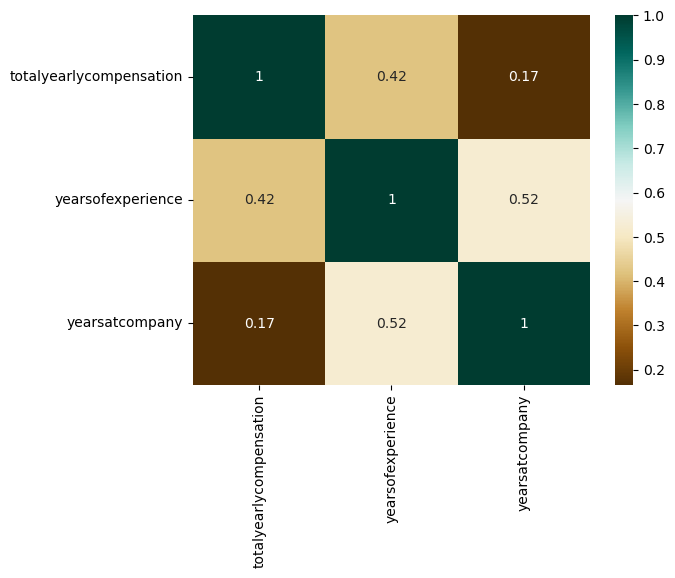

In [11]:
#heatmap for correlation
sns.heatmap(salaries_corr, cmap = "BrBG",annot=True)

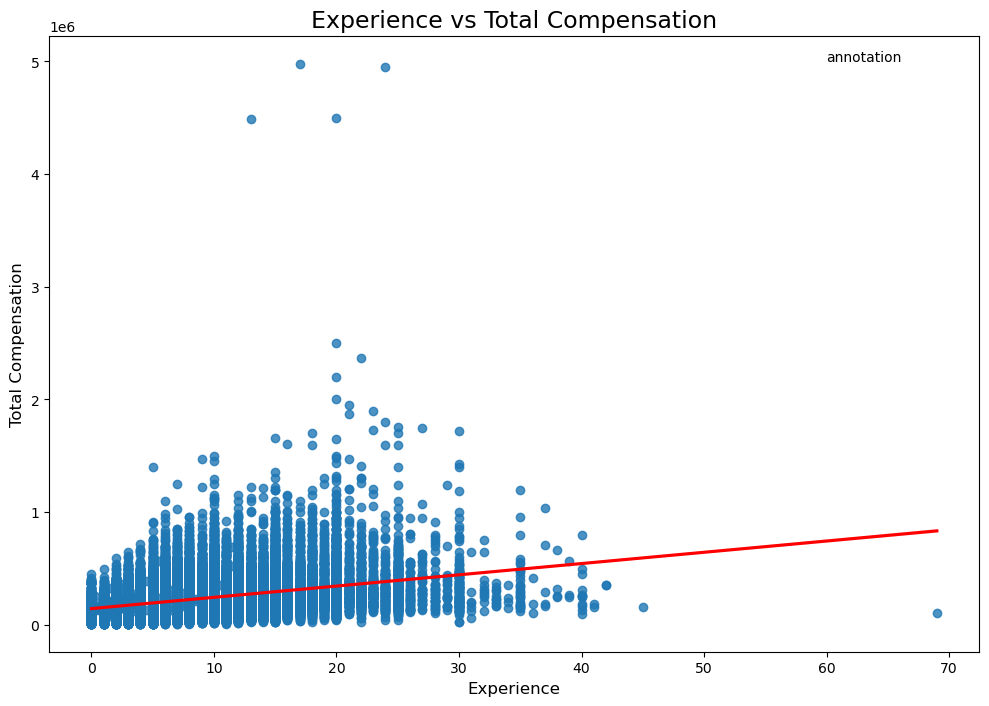

In [12]:
# plot the year compensation vs experiences
plt.figure(figsize=(12,8))
sns.regplot(x=salaries_df["yearsofexperience"], y=salaries_df["totalyearlycompensation"], line_kws = {"color": "red"})
plt.title("Experience vs Total Compensation", size=17)
plt.xlabel("Experience", size=12)
plt.ylabel("Total Compensation", size=12)
plt.text(60, 5000000, "annotation")
plt.show()

# Gender

In [13]:
# Gender value count
gender = salaries_df["gender"].value_counts()
gender

Male       35702
Unknown    19541
Female      6999
Other        400
Name: gender, dtype: int64

In [14]:
female_stat = salaries_df.loc[(salaries_df["gender"] == "Female")].mean()
female_stat

totalyearlycompensation    195119.588513
latitude                       39.432706
longitude                     -96.777695
yearsofexperience               6.134126
yearsatcompany                  2.365238
basesalary                 133823.203315
stockgrantvalue             39422.272610
bonus                       17200.592942
dtype: float64

In [15]:
male_stat = salaries_df.loc[(salaries_df["gender"] == "Male")].mean()
male_stat

totalyearlycompensation    212446.977928
latitude                       38.661581
longitude                     -83.970007
yearsofexperience               7.287895
yearsatcompany                  2.738491
basesalary                 136315.199933
stockgrantvalue             51364.059436
bonus                       19395.310179
dtype: float64

In [16]:
gender_plot = salaries_df[["gender", "totalyearlycompensation"]].copy()
gender_plot.head()

,gender,totalyearlycompensation
0,Unknown,127000
1,Unknown,100000
2,Unknown,310000
3,Unknown,372000
4,Unknown,157000


In [17]:
gender_plot['gender'].unique()

array(['Unknown', 'Male', 'Female', 'Other'], dtype=object)

In [18]:
gender_plot = gender_plot.loc[(gender_plot["gender"] != "Unknown") & (gender_plot["gender"] != "Other")]

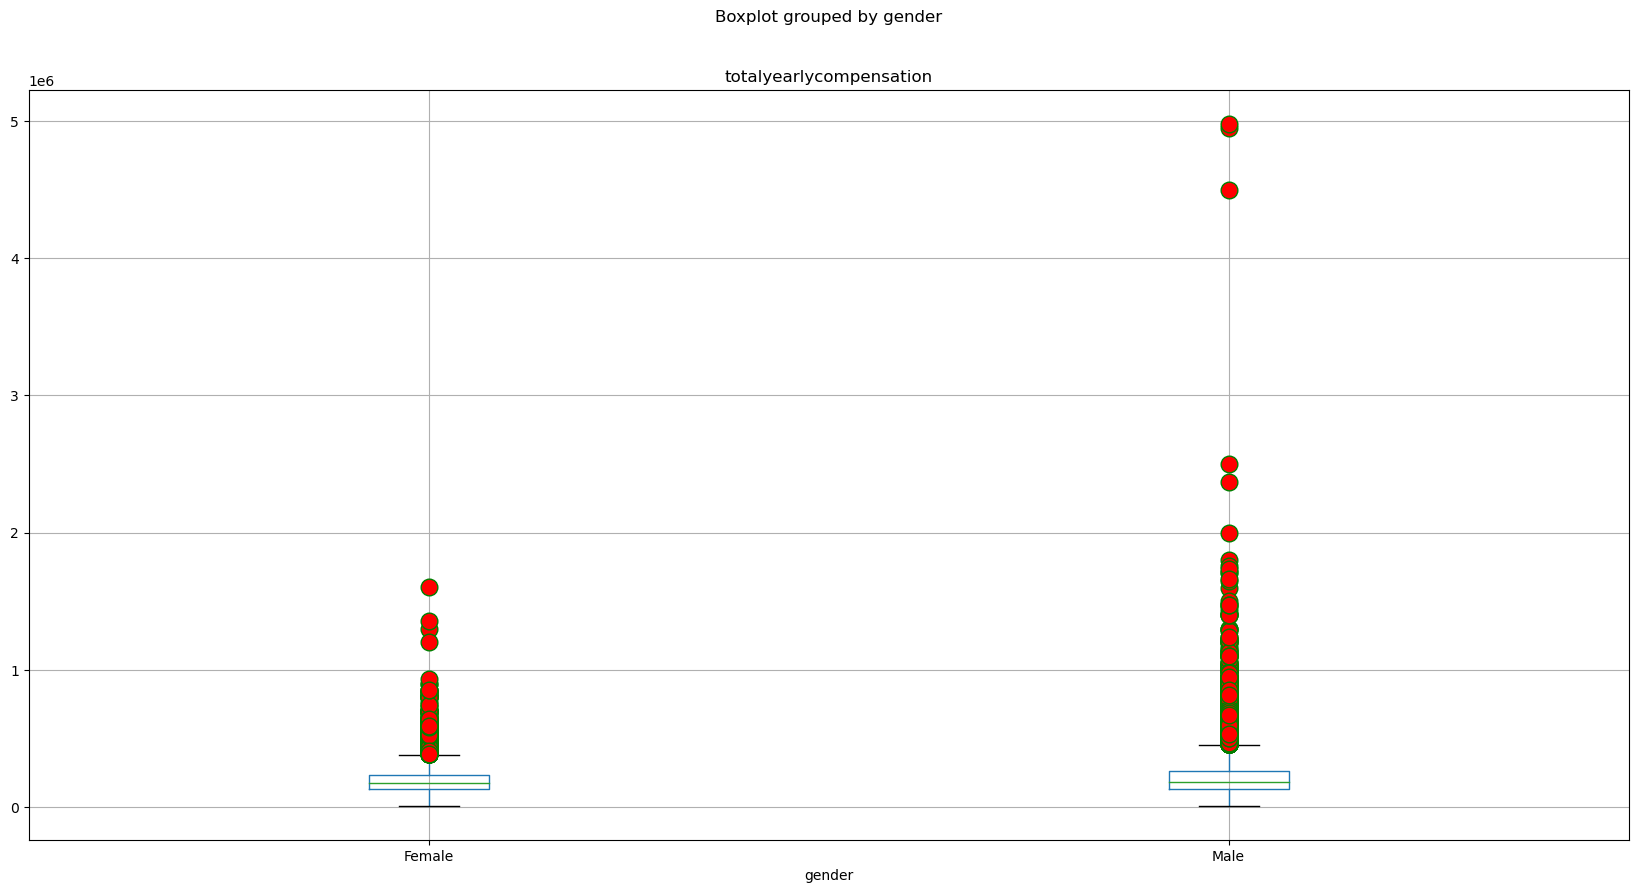

In [19]:
# plot for Gender boxplot
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g', )
gender_plot.boxplot("totalyearlycompensation", by="gender", figsize=(20, 10), flierprops=flierprops)
plt.show()

In [20]:
gender_plot.value_counts()

gender  totalyearlycompensation
Male    200000                     643
        150000                     569
        180000                     477
        160000                     473
        250000                     453
                                  ... 
Female  371000                       1
        373000                       1
Male    503000                       1
Female  382000                       1
Male    4980000                      1
Length: 1316, dtype: int64

In [21]:
# Creating Group for Anova
female = salaries_df[salaries_df["gender"]== "Female"]["totalyearlycompensation"]
male = salaries_df[salaries_df["gender"]== "Male"]["totalyearlycompensation"]

In [22]:
ret = stats.f_oneway(female, male)
ret

F_onewayResult(statistic=97.03653044197561, pvalue=7.199280899773692e-23)

In [23]:
list(ret)

[97.03653044197561, 7.199280899773692e-23]

In [24]:
# create a function for p-value statistically significant analysis with 0.5 
def pvalue_stat(pval, a=.05):
    if pval<a :
        return f"{pval} ({pval:0.6f}) is Statistically Significant (reject the null hypothesis)"
    return f"{pval} ({pval:0.6f}) is Statistically Non-Significant (failed to reject the null hypothesis)"

In [25]:
pvalue_stat(ret[1])

'7.199280899773692e-23 (0.000000) is Statistically Significant (reject the null hypothesis)'

# Race

In [26]:
race = salaries_df["Race"].value_counts()
race

Unknown        40215
Asian          11772
White           8032
Hispanic        1129
Two Or More      804
Black            690
Name: Race, dtype: int64

In [27]:
asian_stat = salaries_df.loc[(salaries_df["Race"]== "Asian")].mean()
asian_stat

totalyearlycompensation    193324.753653
latitude                       36.051929
longitude                     -71.682934
yearsofexperience               6.564815
yearsatcompany                  2.526461
basesalary                 129829.170914
stockgrantvalue             44603.525314
bonus                       18054.451240
dtype: float64

In [28]:
black_stat = salaries_df.loc[(salaries_df["Race"]== "Black")].mean()
black_stat

totalyearlycompensation    181324.637681
latitude                       39.606069
longitude                     -94.039314
yearsofexperience               5.949275
yearsatcompany                  1.842029
basesalary                 131549.275362
stockgrantvalue             28798.453623
bonus                       18313.043478
dtype: float64

In [29]:
hispanic_stat = salaries_df.loc[(salaries_df["Race"]== "Hispanic")].mean()
hispanic_stat

totalyearlycompensation    189701.505757
latitude                       37.627171
longitude                     -95.423529
yearsofexperience               7.113375
yearsatcompany                  2.522586
basesalary                 132629.760850
stockgrantvalue             39172.719221
bonus                       17957.484500
dtype: float64

In [30]:
two_or_more_stat = salaries_df.loc[(salaries_df["Race"]== "Two or More")].mean()
two_or_more_stat

timestamp                  NaN
date                       NaN
company                    NaN
level                      NaN
title                      NaN
totalyearlycompensation    NaN
location                   NaN
latitude                   NaN
longitude                  NaN
yearsofexperience          NaN
yearsatcompany             NaN
basesalary                 NaN
stockgrantvalue            NaN
bonus                      NaN
gender                     NaN
Race                       NaN
Education                  NaN
dtype: object

In [31]:
white_stat = salaries_df.loc[(salaries_df["Race"]== "White")].mean()
white_stat

totalyearlycompensation    206293.700199
latitude                       40.893036
longitude                     -82.344608
yearsofexperience               8.189617
yearsatcompany                  3.104333
basesalary                 139939.492032
stockgrantvalue             47007.584661
bonus                       18790.214143
dtype: float64

In [32]:
# Creating Group for Anova
asian = salaries_df[salaries_df["Race"]== "Asian"]["totalyearlycompensation"]
black = salaries_df[salaries_df["Race"]== "Black"]["totalyearlycompensation"]
hispanic = salaries_df[salaries_df["Race"]== "Hispanic"]["totalyearlycompensation"]
two_or_more = salaries_df[salaries_df["Race"]== "Two Or More"]["totalyearlycompensation"]
white = salaries_df[salaries_df["Race"]== "White"]["totalyearlycompensation"]

In [33]:
ret = stats.f_oneway(asian, black, hispanic, two_or_more, white)
ret

F_onewayResult(statistic=15.76566761913388, pvalue=6.862083786426721e-13)

In [34]:
list(ret)

[15.76566761913388, 6.862083786426721e-13]

In [35]:
pvalue_stat(ret[1])

'6.862083786426721e-13 (0.000000) is Statistically Significant (reject the null hypothesis)'

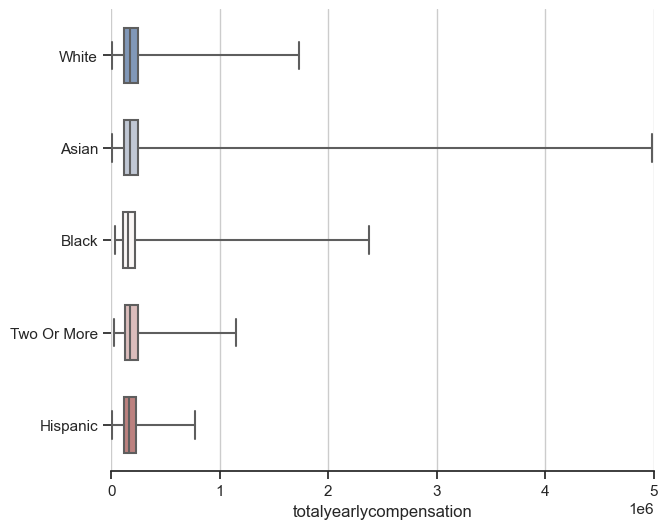

In [36]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")
salaries_df2 = salaries_df.loc[salaries_df["Race"]!= "Unknown"]

# Plot the orbital period with horizontal boxes
plot = sns.boxplot(x="totalyearlycompensation", y="Race", data=salaries_df2,
            whis=[0, 100], width=.6, palette="vlag")
plot.set(xlim = (0,5000000))
# Add in points to show each observation
#sns.stripplot(x="totalyearlycompensation", y="Race", data=salaries_df,
              #size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


# Education

In [37]:
education = salaries_df["Education"].value_counts()
education

Unknown              32272
Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64

In [38]:
master_stat = salaries_df.loc[(salaries_df["Education"]== "Master's Degree")].mean()
master_stat

totalyearlycompensation    220731.076603
latitude                       39.124024
longitude                     -88.071851
yearsofexperience               7.821292
yearsatcompany                  2.851397
basesalary                 145744.006237
stockgrantvalue             53023.926321
bonus                       20814.634527
dtype: float64

In [39]:
bachelor_stat = salaries_df.loc[(salaries_df["Education"]== "Bachelor's Degree")].mean()
bachelor_stat

totalyearlycompensation    177845.409095
latitude                       37.189570
longitude                     -71.384584
yearsofexperience               6.396397
yearsatcompany                  2.523451
basesalary                 123958.495358
stockgrantvalue             37679.677407
bonus                       15982.541068
dtype: float64

In [40]:
phd_stat = salaries_df.loc[(salaries_df["Education"]== "PhD")].mean()
phd_stat

totalyearlycompensation    291865.531415
latitude                       39.862428
longitude                    -101.787369
yearsofexperience               6.898415
yearsatcompany                  2.706812
basesalary                 173409.864944
stockgrantvalue             88083.969466
bonus                       30432.765708
dtype: float64

In [41]:
some_college_stat = salaries_df.loc[(salaries_df["Education"]== "Some College")].mean()
some_college_stat

totalyearlycompensation    210121.126761
latitude                       39.454916
longitude                     -89.520371
yearsofexperience              10.138028
yearsatcompany                  2.949296
basesalary                 141966.197183
stockgrantvalue             49557.746479
bonus                       18670.422535
dtype: float64

In [42]:
high_school_stat = salaries_df.loc[(salaries_df["Education"]== "Highschool")].mean()
high_school_stat

totalyearlycompensation    187731.250000
latitude                       39.812040
longitude                     -68.470732
yearsofexperience               8.150000
yearsatcompany                  2.431250
basesalary                 129378.125000
stockgrantvalue             41640.625000
bonus                       16750.000000
dtype: float64

In [43]:
# Creating Group for Anova
master = salaries_df[salaries_df["Education"]== "Master's Degree"]["totalyearlycompensation"]
bachelor = salaries_df[salaries_df["Education"]== "Bachelor's Degree"]["totalyearlycompensation"]
phD = salaries_df[salaries_df["Education"]== "PhD"]["totalyearlycompensation"]
some_college = salaries_df[salaries_df["Education"]== "Some College"]["totalyearlycompensation"]
highschool = salaries_df[salaries_df["Education"]== "Highschool"]["totalyearlycompensation"]

In [44]:
ret = stats.f_oneway(asian, black, hispanic, two_or_more, white)
ret

F_onewayResult(statistic=15.76566761913388, pvalue=6.862083786426721e-13)

In [45]:
list(ret)

[15.76566761913388, 6.862083786426721e-13]

In [46]:
pvalue_stat(ret[1])

'6.862083786426721e-13 (0.000000) is Statistically Significant (reject the null hypothesis)'

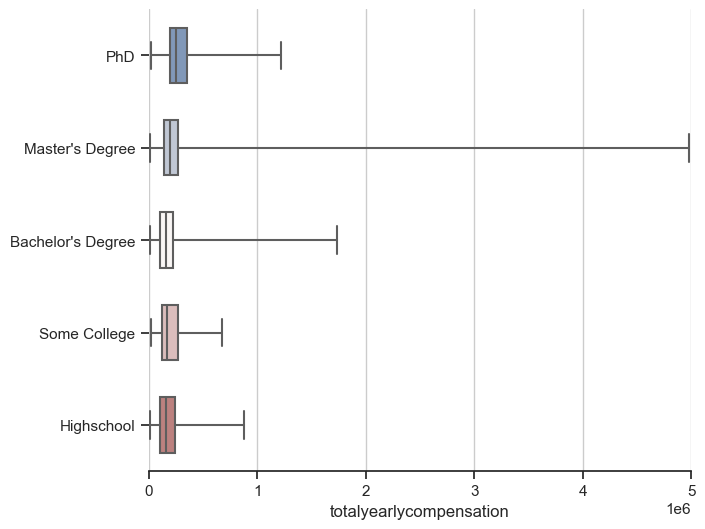

In [47]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")
salaries_race = salaries_df.loc[salaries_df["Education"]!= "Unknown"]

# Plot the orbital period with horizontal boxes
plot = sns.boxplot(x="totalyearlycompensation", y="Education", data=salaries_race,
            whis=[0, 100], width=.6, palette="vlag")
plot.set(xlim = (0,5000000))

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
